In [1]:
%matplotlib widget


In [2]:
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv("mc_observables.csv")
df.tail()


,step,accept_rate,delta_theta,avg_w,avg_cos_theta,S_entropy,S_triangle,action
5,6000,0.67683,1.34550,0.42813,-0.07249,-6.95357,-157.11402,-164.06760
6,7000,0.63557,1.62805,0.42813,-0.09079,-6.95357,-159.07819,-166.03177
7,8000,0.60325,1.96995,0.42813,-0.03499,-6.95357,-158.55158,-165.50516
8,9000,0.57611,2.38364,0.42813,0.03461,-6.95357,-155.80934,-162.76292
9,10000,0.55090,2.62200,0.42813,-0.03978,-6.95357,-160.51788,-167.47145


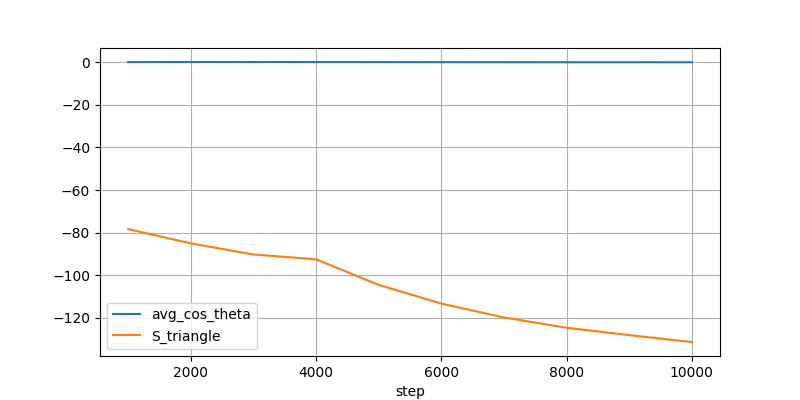

In [4]:
window = 500                    # adjust as you like
smooth = (
    df.rolling(window=500, on="step", min_periods=1)
      .mean()
)

smooth.plot(x="step", y=["avg_cos_theta", "S_triangle"], figsize=(8, 4))
plt.grid()



In [5]:
print(len(df))        # how many rows
print(len(smooth))    # after rolling/dropna


10
10


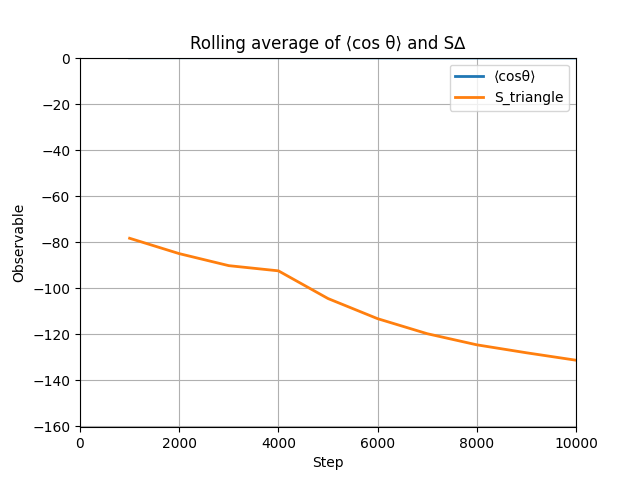

In [6]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np

fig, ax = plt.subplots()
ax.set_xlabel("Step")
ax.set_ylabel("Observable")
ax.set_title("Rolling average of ⟨cos θ⟩ and S∆")

# prepare empty lines
(line1,) = ax.plot([], [], label="⟨cosθ⟩", lw=2)
(line2,) = ax.plot([], [], label="S_triangle", lw=2)
ax.legend()
ax.grid()

# initialise axes
ax.set_xlim(0, df["step"].max())
ax.set_ylim(df[["avg_cos_theta", "S_triangle"]].min().min(),
            df[["avg_cos_theta", "S_triangle"]].max().max())

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2

def update(frame):
    # frame is an index into smooth
    upto = smooth.iloc[:frame+1]
    line1.set_data(upto["step"], upto["avg_cos_theta"])
    line2.set_data(upto["step"], upto["S_triangle"])
    return line1, line2

anim = FuncAnimation(fig, update, frames=len(smooth), init_func=init,
                     interval=40, blit=True)

HTML(anim.to_jshtml())      # inline animation; takes a few seconds to render


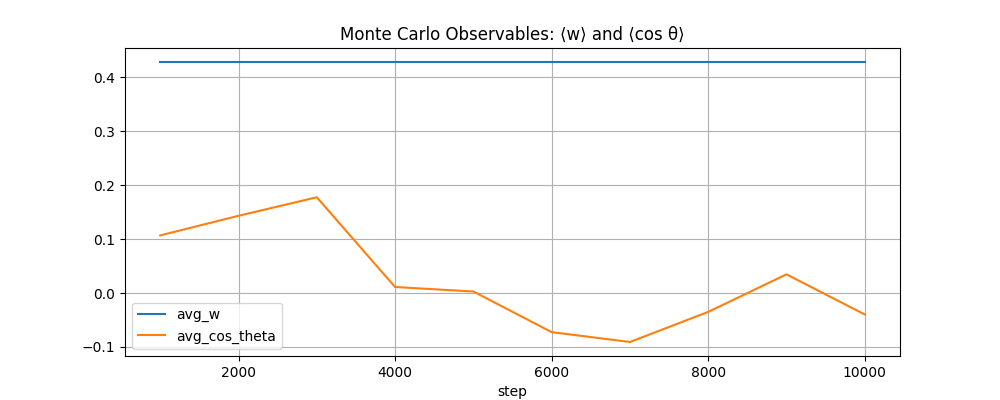

In [7]:
import matplotlib.pyplot as plt

df.plot(x="step", y=["avg_w", "avg_cos_theta"], figsize=(10, 4))
plt.grid(True)
plt.title("Monte Carlo Observables: ⟨w⟩ and ⟨cos θ⟩")
plt.show()


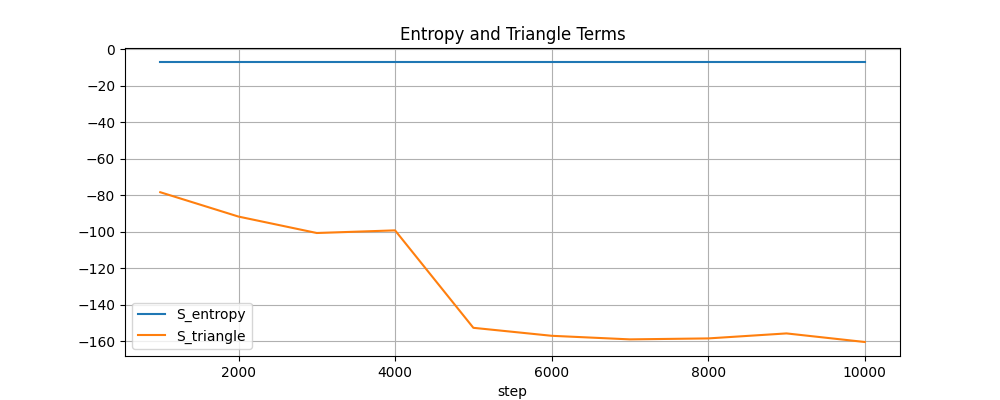

In [8]:
df.plot(x="step", y=["S_entropy", "S_triangle"], figsize=(10, 4))
plt.grid(True)
plt.title("Entropy and Triangle Terms")
plt.show()


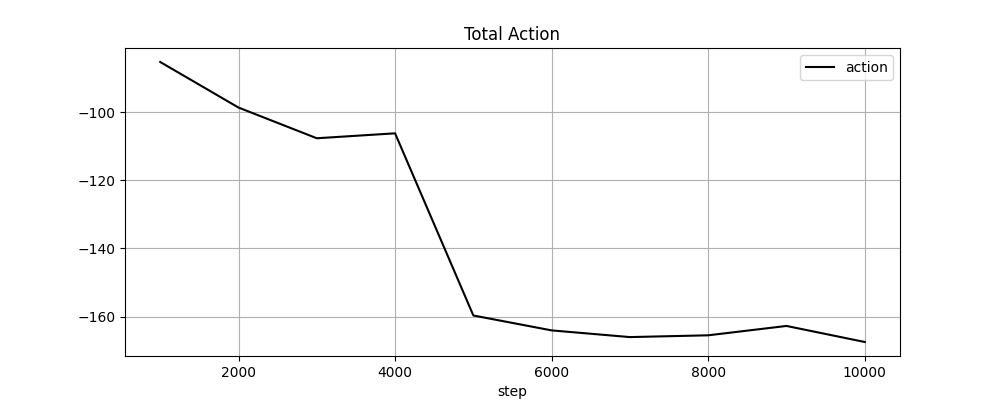

In [9]:
df.plot(x="step", y="action", figsize=(10, 4), color="black")
plt.grid(True)
plt.title("Total Action")
plt.show()


In [10]:
df.describe()


,step,accept_rate,delta_theta,avg_w,avg_cos_theta,S_entropy,S_triangle,action
count,10.000000,10.000000,10.000000,10.00000,10.000000,1.000000e+01,10.000000,10.000000
mean,5500.000000,0.701184,1.324580,0.42813,0.023779,-6.953570e+00,-131.395279,-138.348855
std,3027.650354,0.109542,0.813165,0.00000,0.091493,9.362223e-16,34.025600,34.025601
min,1000.000000,0.550900,0.292820,0.42813,-0.090790,-6.953570e+00,-160.517880,-167.471450
25%,3250.000000,0.611330,0.679630,0.42813,-0.038583,-6.953570e+00,-158.192190,-165.145770
50%,5500.000000,0.697215,1.228740,0.42813,0.006965,-6.953570e+00,-154.274325,-161.227900
75%,7750.000000,0.789810,1.884475,0.42813,0.088730,-6.953570e+00,-99.657885,-106.611463
max,10000.000000,0.853000,2.622000,0.42813,0.177430,-6.953570e+00,-78.369760,-85.323330
